In [191]:
import openpyxl
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import folium
from branca.colormap import LinearColormap
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap




In [21]:
# 엑셀 파일 열기
file_path = '지하철 정보.xlsx'  # 엑셀 파일 경로를 적절히 수정해주세요
workbook = openpyxl.load_workbook(file_path)

# 원하는 시트 선택
sheet = workbook.active  # 또는 workbook['Sheet1']와 같이 시트 이름을 직접 지정할 수 있습니다.

# 시트의 데이터를 DataFrame으로 변환
data = sheet.values
columns = next(data)  # 첫 번째 행을 컬럼으로 사용
df = pd.DataFrame(data, columns=columns)



In [159]:
# 엑셀 파일 열기
file_path = 'rainfall_data.xlsx'  # 엑셀 파일 경로를 적절히 수정해주세요
workbook = openpyxl.load_workbook(file_path)

# 원하는 시트 선택
sheet = workbook.active  # 또는 workbook['Sheet1']와 같이 시트 이름을 직접 지정할 수 있습니다.

# 시트의 데이터를 DataFrame으로 변환
data = sheet.values
columns = next(data)  # 첫 번째 행을 컬럼으로 사용
rainfall_data = pd.DataFrame(data, columns=columns)

In [160]:
# 엑셀 파일 열기
file_path = 't.xlsx'  # 엑셀 파일 경로를 적절히 수정해주세요
workbook = openpyxl.load_workbook(file_path)

# 원하는 시트 선택
sheet = workbook.active  # 또는 workbook['Sheet1']와 같이 시트 이름을 직접 지정할 수 있습니다.

# 시트의 데이터를 DataFrame으로 변환
data = sheet.values
columns = next(data)  # 첫 번째 행을 컬럼으로 사용
t_data = pd.DataFrame(data, columns=columns)

In [37]:
# 엑셀 파일 열기
file_path = 'sub_rain_temp_dow.xlsx'  # 엑셀 파일 경로를 적절히 수정해주세요
workbook = openpyxl.load_workbook(file_path)

# 원하는 시트 선택
sheet = workbook.active  # 또는 workbook['Sheet1']와 같이 시트 이름을 직접 지정할 수 있습니다.

# 시트의 데이터를 DataFrame으로 변환
data_sub = sheet.values
columns = next(data_sub)  # 첫 번째 행을 컬럼으로 사용
df_all = pd.DataFrame(data_sub, columns=columns)
sc = list(df_all['subway_station_code'])




In [165]:
# 엑셀 파일 열기
file_path = 'result_df.xlsx'  # 엑셀 파일 경로를 적절히 수정해주세요
workbook = openpyxl.load_workbook(file_path)

# 원하는 시트 선택
sheet = workbook.active  # 또는 workbook['Sheet1']와 같이 시트 이름을 직접 지정할 수 있습니다.

# 시트의 데이터를 DataFrame으로 변환
data_sub = sheet.values
columns = next(data_sub)  # 첫 번째 행을 컬럼으로 사용
result_df = pd.DataFrame(data_sub, columns=columns)


In [101]:
df_all

,USE_DT,subway_station_code,subway_station_name,division,05~06,06~07,07~08,08~09,09~10,10~11,...,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차,요일
0,2015-01-01,150,서울역(150),승차,441,399,572,1106,1474,2020,...,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,...,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,...,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,...,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,...,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004349,2019-12-31,2825,신흥,하차,20,87,86,243,208,189,...,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday
1004350,2019-12-31,2826,수진,승차,111,224,542,813,436,343,...,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday
1004351,2019-12-31,2826,수진,하차,27,97,115,433,259,198,...,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday
1004352,2019-12-31,2827,모란,승차,73,95,342,482,253,210,...,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday


In [109]:
df_on =  df_all[df_all['division'] != '하차']


In [38]:
unique_values = list(set(sc))



In [22]:
df

,subway_station_code,subway_station_name,line,external_code,cyber_station,x_coordinate,y_coordinate,x_xgs,y_xgs
0,2818,가락시장,8,817,2818,525992.0,1108579.0,37.492522,127.118234
1,340,가락시장,3,350,2818,525992.0,1108579.0,37.492522,127.118234
2,2535,종로3가,5,534,153,498060.0,1130332.0,37.571607,126.991806
3,319,종로3가,3,329,153,498060.0,1130332.0,37.571607,126.991806
4,153,종로3가,1,130,153,498060.0,1130332.0,37.571607,126.991806
...,...,...,...,...,...,...,...,...,...
924,4505,동백,E,Y114,4505,533700.0,1046500.0,37.269043,127.152716
925,4506,초당,E,Y115,4506,535500.0,1044100.0,37.260752,127.159443
926,4508,삼가,E,Y116,4508,537300.0,1039000.0,37.242115,127.168075
927,4509,시청?용인대,E,Y117,4509,539500.0,1038300.0,37.239151,127.178406


In [95]:
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)
df_f = df[['subway_station_code','x_xgs', 'y_xgs']]


In [96]:
df_f

,subway_station_code,x_xgs,y_xgs
0,2818,37.492522,127.118234
1,340,37.492522,127.118234
2,2535,37.571607,126.991806
3,319,37.571607,126.991806
4,153,37.571607,126.991806
...,...,...,...
924,4505,37.269043,127.152716
925,4506,37.260752,127.159443
926,4508,37.242115,127.168075
927,4509,37.239151,127.178406


In [40]:

selected_rows = df[df['subway_station_code'].isin(unique_values)]

# 클러스터링에 사용할 특성 선택 (여기서는 'x_coordinate'와 'y_coordinate'를 사용합니다)
features = selected_rows[['x_coordinate', 'y_coordinate']]

# KMeans 클러스터링
num_clusters = 3  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터링 결과 출력
print(selected_rows[['subway_station_code', 'subway_station_name', 'cluster']])


     subway_station_code subway_station_name  cluster
0                   2818                가락시장        0
1                    340                가락시장        0
2                   2535                종로3가        2
3                    319                종로3가        2
4                    153                종로3가        2
..                   ...                 ...      ...
803                 2823              남한산성입구        0
804                 2824               단대오거리        0
805                 2825                  신흥        0
806                 2826                  수진        0
816                 2761                부평구청        1

[401 rows x 3 columns]


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/3269720097.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

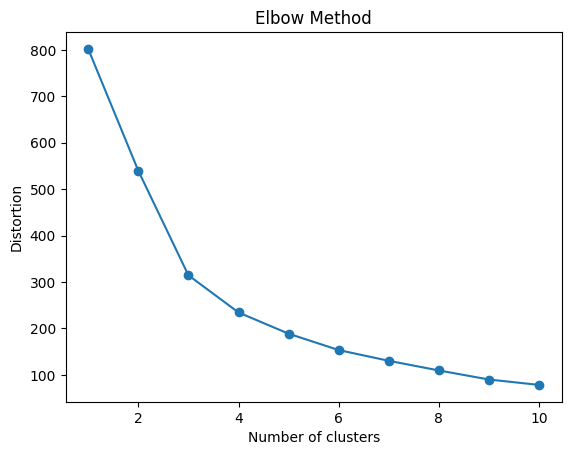

In [42]:

# 클러스터링에 사용할 특성 선택 (여기서는 'x_coordinate'와 'y_coordinate'를 사용합니다)
features = selected_rows[['x_coordinate', 'y_coordinate']]

# 엘보우 기법을 사용하여 최적의 클러스터 개수 찾기
def find_optimal_clusters(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=i, random_state=42))
        kmeans.fit(data)
        distortions.append(kmeans.named_steps['kmeans'].inertia_)
    
    # 엘보우 포인트 찾기
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# 최대 클러스터 개수 지정 (원하는 범위로 수정 가능)
max_clusters = 10
find_optimal_clusters(features, max_clusters)


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/2024627995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


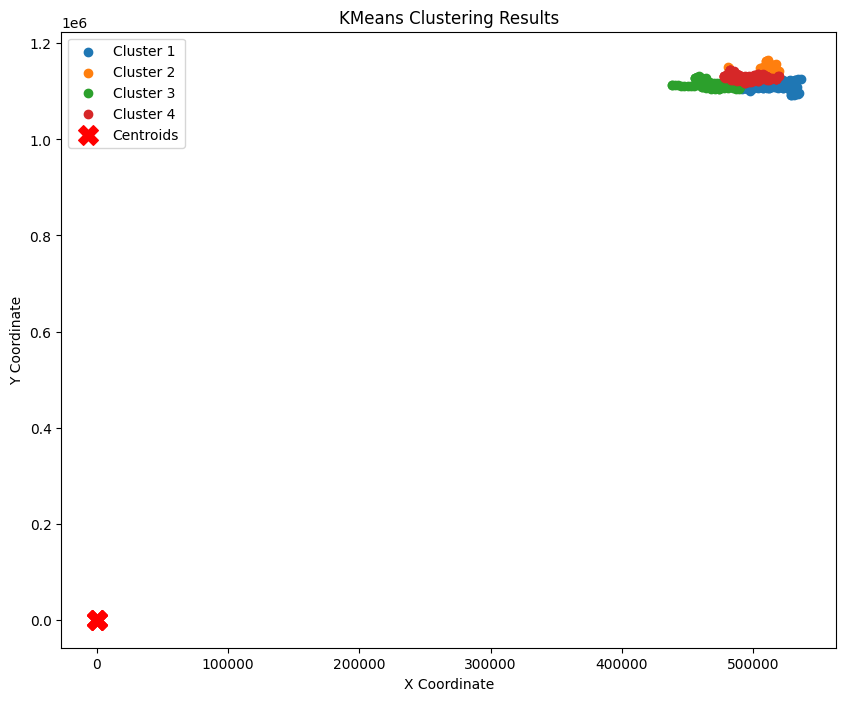

In [57]:

# KMeans 클러스터링 수행 (클러스터 개수: 4)
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=42))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))

# 각 클러스터를 다른 색으로 표시
for cluster in range(4):
    cluster_data = selected_rows[selected_rows['cluster'] == cluster]
    plt.scatter(cluster_data['x_coordinate'], cluster_data['y_coordinate'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.named_steps['kmeans'].cluster_centers_[:, 0], kmeans.named_steps['kmeans'].cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KMeans Clustering Results')
plt.legend()
plt.show()

/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/1618812031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


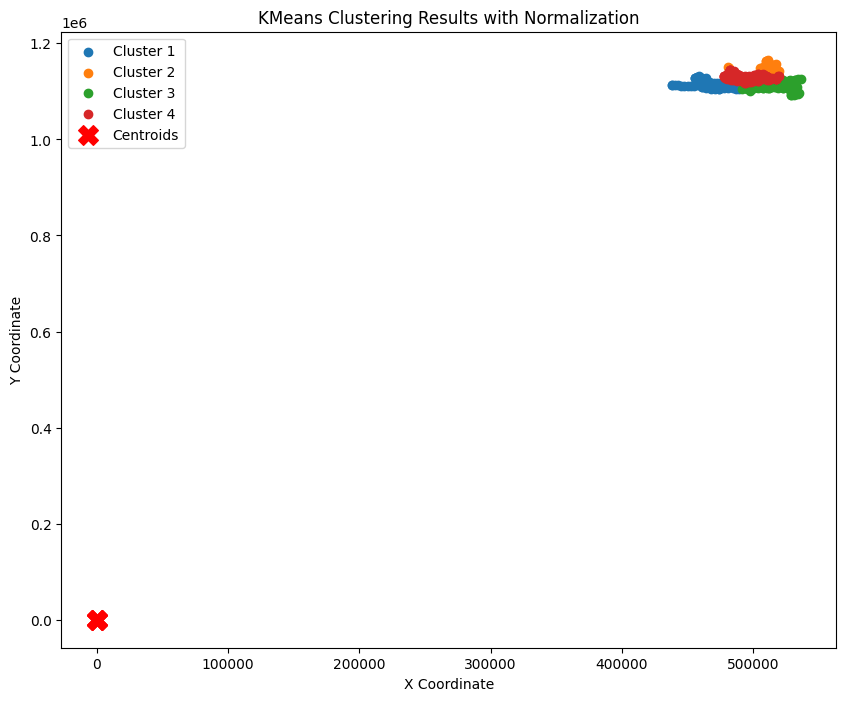

In [45]:

# 정규화 및 KMeans 클러스터링 수행 (클러스터 개수: 4)
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=10))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))

# 각 클러스터를 다른 색으로 표시
for cluster in range(4):
    cluster_data = selected_rows[selected_rows['cluster'] == cluster]
    plt.scatter(cluster_data['x_coordinate'], cluster_data['y_coordinate'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.named_steps['kmeans'].cluster_centers_[:, 0], kmeans.named_steps['kmeans'].cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KMeans Clustering Results with Normalization')
plt.legend()
plt.show()


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/1840227109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


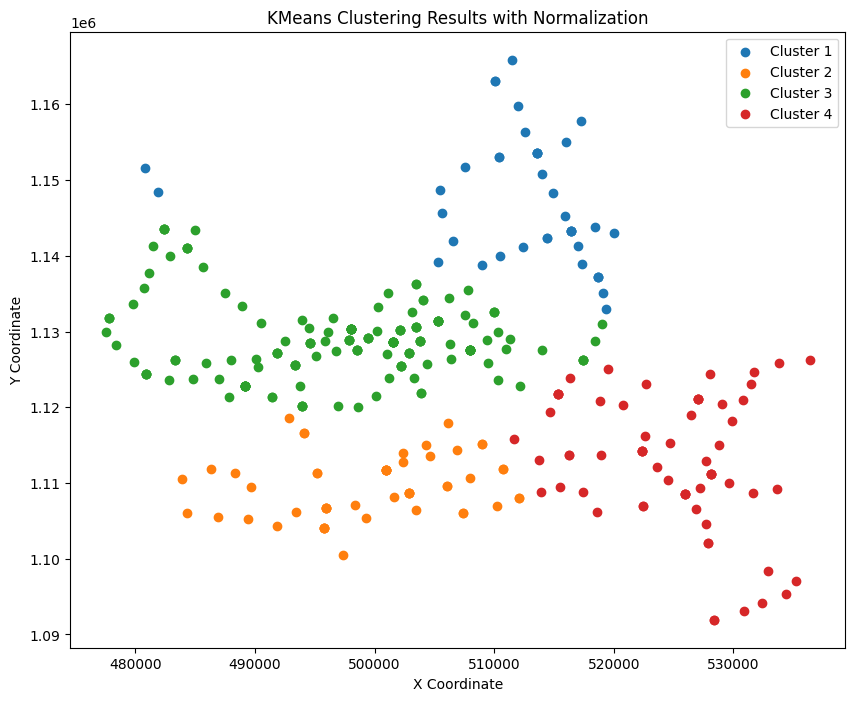

In [55]:

# 정규화 및 KMeans 클러스터링 수행 (클러스터 개수: 4)
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=10))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))

# 각 클러스터를 다른 색으로 표시
for cluster in range(4):
    cluster_data = selected_rows[selected_rows['cluster'] == cluster]
    plt.scatter(cluster_data['x_coordinate'], cluster_data['y_coordinate'], label=f'Cluster {cluster + 1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KMeans Clustering Results with Normalization')
plt.legend()
plt.show()



/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/2622508640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


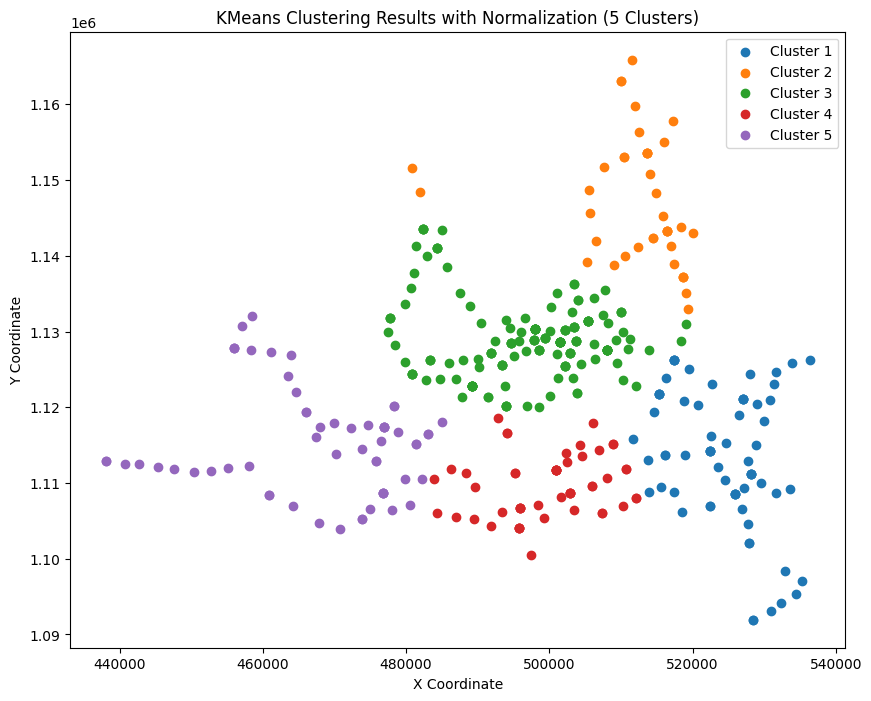

In [58]:

# 정규화 및 KMeans 클러스터링 수행 (클러스터 개수: 5)
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=42))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))

# 각 클러스터를 다른 색으로 표시
for cluster in range(5):
    cluster_data = selected_rows[selected_rows['cluster'] == cluster]
    plt.scatter(cluster_data['x_coordinate'], cluster_data['y_coordinate'], label=f'Cluster {cluster + 1}')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('KMeans Clustering Results with Normalization (5 Clusters)')
plt.legend()
plt.show()


In [64]:

# KMeans 클러스터링 수행 (클러스터 개수: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
selected_rows['cluster'] = kmeans.fit_predict(features)

# Folium 지도 생성
map_center = [selected_rows['y_coordinate'].mean(), selected_rows['x_coordinate'].mean()]  # 중심 좌표 설정
map_clusters = folium.Map(location=map_center, zoom_start=13)

# 클러스터를 지도에 추가
for _, row in selected_rows.iterrows():
    folium.Marker(
        location=[row['y_coordinate'], row['x_coordinate']],
        popup=f"Cluster: {row['cluster'] + 1}",
        icon=folium.Icon(color=f'cluster_{row["cluster"] + 1}')
    ).add_to(map_clusters)

# 지도를 HTML 파일로 저장
map_clusters.save("cluster_map.html")


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/1867096316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/1867096316.py:14: UserWarning: color argument of Icon should be one of: {'blue', 'red', 'lightred', 'cadetblue', 'green', 'lightgreen', 'darkgreen', 'beige', 'darkpurple', 'white', 'darkblue', 'orange', 'black', 'purple', 'lightgray', '

In [232]:

selected_rows['cluster'] = 1

# 클러스터에 따라 색상 지정
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple'], vmin=0, vmax=4)

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['x_xgs'].mean(), selected_rows['y_xgs'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster'] + 1}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)


mymap.save("non_cluster_map.html")


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/208806062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = 1


In [65]:

# 클러스터링에 사용할 특성 선택 (여기서는 'x_xgs'와 'y_xgs'를 사용합니다)
features_2 = selected_rows[['x_xgs', 'y_xgs']]

# KMeans 클러스터링 수행 (클러스터 개수: 5)
kmeans = KMeans(n_clusters=5, random_state=42)
selected_rows['cluster'] = kmeans.fit_predict(features_2)

# Folium 지도 생성
map_center = [selected_rows['y_xgs'].mean(), selected_rows['x_xgs'].mean()]  # 중심 좌표 설정
map_clusters = folium.Map(location=map_center, zoom_start=13)

# 클러스터를 지도에 추가
for _, row in selected_rows.iterrows():
    folium.Marker(
        location=[row['y_xgs'], row['x_xgs']],
        popup=f"Cluster: {row['cluster'] + 1}",
        icon=folium.Icon(color=f'cluster_{row["cluster"] + 1}')
    ).add_to(map_clusters)

# 지도를 HTML 파일로 저장
map_clusters.save("cluster_map.html")


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/165043655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features_2)
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/165043655.py:17: UserWarning: color argument of Icon should be one of: {'blue', 'red', 'lightred', 'cadetblue', 'green', 'lightgreen', 'darkgreen', 'beige', 'darkpurple', 'white', 'darkblue', 'orange', 'black', 'purple', 'lightgray', '

In [67]:

# 클러스터링에 사용할 특성 선택 (여기서는 'x_xgs'와 'y_xgs'를 사용합니다)
features = selected_rows[['x_xgs', 'y_xgs']]

# 정규화 및 KMeans 클러스터링 수행 (클러스터 개수: 5)
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=42))
selected_rows['cluster'] = kmeans.fit_predict(features)

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['x_xgs'].mean(), selected_rows['y_xgs'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    folium.Marker(
        location=[row['x_xgs'], row['y_xgs']],
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster'] + 1}",
        icon=folium.Icon(color=f'cluster_{row["cluster"] + 1}')
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('cluster_map.html')


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/3389895580.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/3389895580.py:17: UserWarning: color argument of Icon should be one of: {'blue', 'red', 'lightred', 'cadetblue', 'green', 'lightgreen', 'darkgreen', 'beige', 'darkpurple', 'white', 'darkblue', 'orange', 'black', 'purple', 'lightgray', '

In [69]:

kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=5, random_state=42))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터에 따라 색상 지정
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple'], vmin=0, vmax=4)

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['x_xgs'].mean(), selected_rows['y_xgs'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster'] + 1}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('cluster_map.html')


/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/3660904276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


In [71]:

kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))
selected_rows['cluster'] = kmeans.fit_predict(features)

# 클러스터에 따라 색상 지정
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple'], vmin=0, vmax=4)

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['x_xgs'].mean(), selected_rows['y_xgs'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster'] + 1}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('cluster_map.html')

/Users/hanyoungwook/opt/anaconda3/envs/2023-DS-B/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/2832035922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = kmeans.fit_predict(features)


In [88]:

# 클러스터링에 사용할 특성 선택 (여기서는 'x_xgs'와 'y_xgs'를 사용합니다)
features = selected_rows[['x_xgs', 'y_xgs']]

# 정규화 및 DBSCAN 클러스터링 수행
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
dbscan = DBSCAN(eps=0.3, min_samples=4)
selected_rows['cluster'] = dbscan.fit_predict(features_scaled)

# 클러스터에 따라 색상 지정
unique_clusters = selected_rows['cluster'].unique()
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple', 'gray'], vmin=min(unique_clusters), vmax=max(unique_clusters))

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['x_xgs'].mean(), selected_rows['y_xgs'].mean()]
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster']}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('dbscan_cluster_map.html')


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/2341601025.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = dbscan.fit_predict(features_scaled)


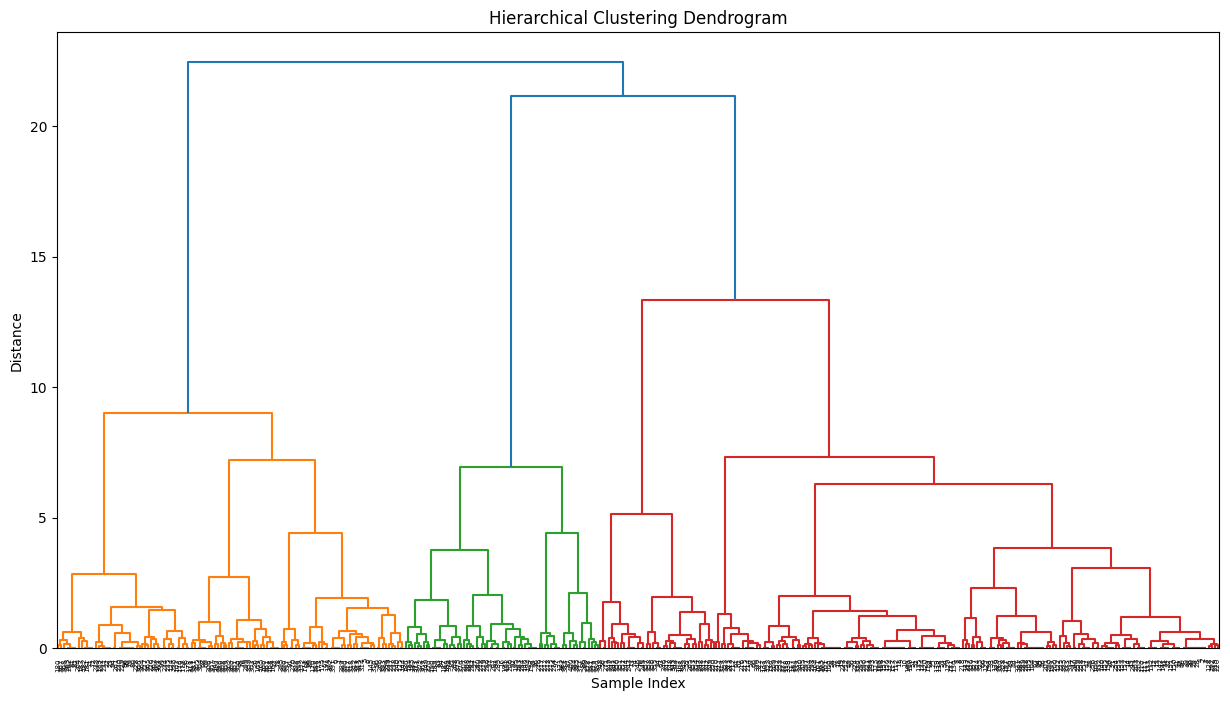

In [84]:

# 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 계층적 군집화 수행
linkage_matrix = linkage(features_scaled, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [195]:

# 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 계층적 군집 수행
linkage_matrix = linkage(features_scaled, method='ward')  # ward linkage를 사용하여 클러스터 간의 분산을 최소화
selected_rows['cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust') 

# 클러스터에 따라 색상 지정
unique_clusters = selected_rows['cluster'].unique()
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple', 'gray'], vmin=min(unique_clusters), vmax=max(unique_clusters))

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['y_xgs'].mean(), selected_rows['x_xgs'].mean()]  # x_xgs와 y_xgs의 순서를 바꿔줬습니다.
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster']}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('hierarchical_cluster_map.html')


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/4141589603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')


In [200]:
selected_rows

,subway_station_code,subway_station_name,line,external_code,cyber_station,x_coordinate,y_coordinate,x_xgs,y_xgs,cluster,color
0,2818,가락시장,8,817,2818,525992.0,1108579.0,37.492522,127.118234,2,green
1,340,가락시장,3,350,2818,525992.0,1108579.0,37.492522,127.118234,2,green
2,2535,종로3가,5,534,153,498060.0,1130332.0,37.571607,126.991806,5,purple
3,319,종로3가,3,329,153,498060.0,1130332.0,37.571607,126.991806,5,purple
4,153,종로3가,1,130,153,498060.0,1130332.0,37.571607,126.991806,5,purple
...,...,...,...,...,...,...,...,...,...,...,...
803,2823,남한산성입구,8,822,2823,535225.0,1097102.0,37.451535,127.159816,2,green
804,2824,단대오거리,8,823,2824,534430.0,1095327.0,37.445210,127.156866,2,green
805,2825,신흥,8,824,2825,532420.0,1094155.0,37.440918,127.147564,2,green
806,2826,수진,8,825,2826,530897.0,1093162.0,37.437428,127.140722,2,green


In [203]:
cluster_counts = selected_rows.groupby('cluster')
print(cluster_counts)


In [204]:

for name, group in cluster_counts:
    print(f"Cluster {name}:\n{group}\n")


Cluster 1:
     subway_station_code subway_station_name line external_code  \
27                   223                  교대    2           223   
28                   330                  교대    3           340   
122                  433                  사당    4           433   
123                  226                  사당    2           226   
131                 2736               고속터미널    7           734   
132                  329               고속터미널    3           339   
133                 2738           총신대입구(이수)    7           736   
134                  432           총신대입구(이수)    4           432   
156                  431                  동작    4           431   
158                 2736               고속터미널    7           734   
159                  329               고속터미널    3           339   
164                  222                  강남    2           222   
166                  332                  양재    3           342   
174                 2732                강남구청    7  

In [205]:
cluster_sizes = selected_rows.groupby('cluster').size()
print(cluster_sizes)


cluster
1     46
2     74
3     67
4     40
5    174
dtype: int64


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/2640924527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['color'] = selected_rows['cluster'].apply(lambda x: colors[x - 1])


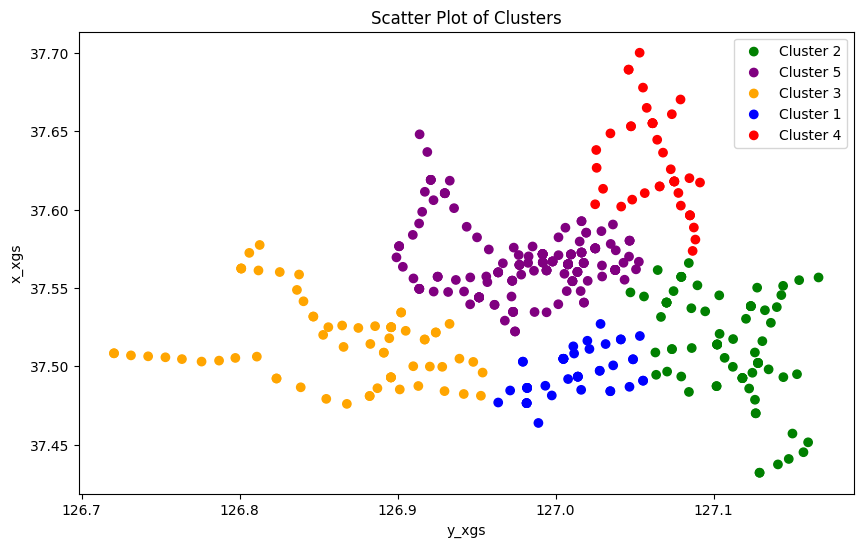

In [199]:

# 클러스터 색상 정의
colors = ['blue', 'green', 'orange', 'red', 'purple', 'gray']
selected_rows['color'] = selected_rows['cluster'].apply(lambda x: colors[x - 1])

# 산점도 그리기
plt.figure(figsize=(10, 6))
for cluster in selected_rows['cluster'].unique():
    cluster_data = selected_rows[selected_rows['cluster'] == cluster]
    plt.scatter(cluster_data['y_xgs'], cluster_data['x_xgs'], color=cluster_data['color'], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Clusters')
plt.xlabel('y_xgs')
plt.ylabel('x_xgs')
plt.legend()
plt.show()


In [189]:
selected_rows

,subway_station_code,subway_station_name,line,external_code,cyber_station,x_coordinate,y_coordinate,x_xgs,y_xgs,cluster
0,2818,가락시장,8,817,2818,525992.0,1108579.0,37.492522,127.118234,2
1,340,가락시장,3,350,2818,525992.0,1108579.0,37.492522,127.118234,2
2,2535,종로3가,5,534,153,498060.0,1130332.0,37.571607,126.991806,5
3,319,종로3가,3,329,153,498060.0,1130332.0,37.571607,126.991806,5
4,153,종로3가,1,130,153,498060.0,1130332.0,37.571607,126.991806,5
...,...,...,...,...,...,...,...,...,...,...
803,2823,남한산성입구,8,822,2823,535225.0,1097102.0,37.451535,127.159816,2
804,2824,단대오거리,8,823,2824,534430.0,1095327.0,37.445210,127.156866,2
805,2825,신흥,8,824,2825,532420.0,1094155.0,37.440918,127.147564,2
806,2826,수진,8,825,2826,530897.0,1093162.0,37.437428,127.140722,2


In [97]:

# 정규화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 계층적 군집 수행
linkage_matrix = linkage(features_scaled, method='ward')  # ward linkage를 사용하여 클러스터 간의 분산을 최소화
selected_rows['cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')  # 클러스터 개수를 5로 선택

# 클러스터 결과를 데이터프레임에 추가
data = pd.merge(df_f, selected_rows[['subway_station_code', 'cluster']], on='subway_station_code', how='left')

# 결과 확인
print(data)

# 클러스터에 따라 색상 지정
unique_clusters = selected_rows['cluster'].unique()
colormap = LinearColormap(['blue', 'green', 'orange', 'red', 'purple', 'gray'], vmin=min(unique_clusters), vmax=max(unique_clusters))

# Folium을 사용하여 지도에 표시
map_center = [selected_rows['y_xgs'].mean(), selected_rows['x_xgs'].mean()]  # x_xgs와 y_xgs의 순서를 바꿔줬습니다.
mymap = folium.Map(location=map_center, zoom_start=13)

# 각 역의 위치를 지도에 표시 (클러스터에 따라 다른 색상 사용)
for index, row in selected_rows.iterrows():
    color = colormap(row['cluster'])
    folium.CircleMarker(
        location=[row['x_xgs'], row['y_xgs']],
        radius=5,
        popup=f"Station: {row['subway_station_name']}\nCluster: {row['cluster']}",
        color=color,
        fill=True,
        fill_color=color
    ).add_to(mymap)

# 지도를 HTML 파일로 저장
mymap.save('hierarchical_cluster_map.html')


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/3020755387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['cluster'] = fcluster(linkage_matrix, t=5, criterion='maxclust')  # 클러스터 개수를 5로 선택


      subway_station_code      x_xgs       y_xgs  cluster
0                    2818  37.492522  127.118234      2.0
1                    2818  37.492522  127.118234      2.0
2                     340  37.492522  127.118234      2.0
3                     340  37.492522  127.118234      2.0
4                    2535  37.571607  126.991806      5.0
...                   ...        ...         ...      ...
1226                 4505  37.269043  127.152716      NaN
1227                 4506  37.260752  127.159443      NaN
1228                 4508  37.242115  127.168075      NaN
1229                 4509  37.239151  127.178406      NaN
1230                 4510  37.237964  127.190294      NaN

[1231 rows x 4 columns]


In [98]:
# 데이터프레임에서 결측치가 있는 행 삭제
data.dropna(inplace=True)


In [102]:


data = data[data['subway_station_code'].isin(unique_values)]

In [104]:
# 데이터프레임에서 중복 행 제거
data.drop_duplicates(inplace=True)


In [106]:
data

,subway_station_code,x_xgs,y_xgs,cluster
0,2818,37.492522,127.118234,2.0
2,340,37.492522,127.118234,2.0
4,2535,37.571607,126.991806,5.0
7,319,37.571607,126.991806,5.0
10,153,37.571607,126.991806,5.0
...,...,...,...,...
1103,2822,37.457122,127.149908,2.0
1104,2823,37.451535,127.159816,2.0
1105,2824,37.445210,127.156866,2.0
1106,2825,37.440918,127.147564,2.0


In [107]:
cluster_num = data[['subway_station_code','cluster']]

In [108]:
cluster_num

,subway_station_code,cluster
0,2818,2.0
2,340,2.0
4,2535,5.0
7,319,5.0
10,153,5.0
...,...,...
1103,2822,2.0
1104,2823,2.0
1105,2824,2.0
1106,2825,2.0


In [110]:
len(df_on)

502177

In [120]:
# df_all과 df_merged를 'subway_station_code'를 기준으로 병합
df_merged = pd.merge(df_on, cluster_num, on='subway_station_code', how='left')




In [121]:
len(df_merged)

502177

In [122]:
df_merged

,USE_DT,subway_station_code,subway_station_name,division,05~06,06~07,07~08,08~09,09~10,10~11,...,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차,요일,cluster
0,2015-01-01,150,서울역(150),승차,441,399,572,1106,1474,2020,...,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday,5.0
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,...,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday,5.0
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,...,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday,5.0
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,...,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday,5.0
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,...,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5",Thursday,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502172,2019-12-31,2823,남한산성입구(성남법원.검찰청),승차,337,723,1848,2562,1244,730,...,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday,2.0
502173,2019-12-31,2824,단대오거리,승차,274,476,1338,1724,863,523,...,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday,2.0
502174,2019-12-31,2825,신흥,승차,106,203,468,614,365,235,...,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday,2.0
502175,2019-12-31,2826,수진,승차,111,224,542,813,436,343,...,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4",Tuesday,2.0


In [126]:
columns_to_drop = ['지점번호']
df_merged = df_merged.drop(columns=columns_to_drop)
df_merged

,USE_DT,subway_station_code,subway_station_name,division,05~06,06~07,07~08,08~09,09~10,10~11,...,20~21,21~22,22~23,23~24,24~,sum,강수 여부,평균기온(℃),요일,cluster
0,2015-01-01,150,서울역(150),승차,441,399,572,1106,1474,2020,...,2749,3247,2437,1279,73,46556,0,-7.7,Thursday,5.0
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,...,950,612,497,192,6,10898,0,-7.7,Thursday,5.0
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,...,1834,1825,1666,736,37,21176,0,-7.7,Thursday,5.0
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,...,1149,1257,953,415,15,17524,0,-7.7,Thursday,5.0
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,...,576,431,241,102,3,9725,0,-7.7,Thursday,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502172,2019-12-31,2823,남한산성입구(성남법원.검찰청),승차,337,723,1848,2562,1244,730,...,318,300,250,122,37,14644,0,-7.9,Tuesday,2.0
502173,2019-12-31,2824,단대오거리,승차,274,476,1338,1724,863,523,...,351,303,228,95,45,11670,0,-7.9,Tuesday,2.0
502174,2019-12-31,2825,신흥,승차,106,203,468,614,365,235,...,225,203,155,72,23,5431,0,-7.9,Tuesday,2.0
502175,2019-12-31,2826,수진,승차,111,224,542,813,436,343,...,219,155,126,68,82,6228,0,-7.9,Tuesday,2.0


In [129]:
# USE_DT 열의 값을 datetime 형식으로 변환하고 년도와 날짜 정보만 남기기
df_merged['USE_DT'] = pd.to_datetime(df_merged['USE_DT']).dt.date




0    2015-01-01
1    2015-01-01
2    2015-01-01
3    2015-01-01
4    2015-01-01
Name: USE_DT, dtype: object


In [130]:
df_merged

,USE_DT,subway_station_code,subway_station_name,division,05~06,06~07,07~08,08~09,09~10,10~11,...,20~21,21~22,22~23,23~24,24~,sum,강수 여부,평균기온(℃),요일,cluster
0,2015-01-01,150,서울역(150),승차,441,399,572,1106,1474,2020,...,2749,3247,2437,1279,73,46556,0,-7.7,Thursday,5.0
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,...,950,612,497,192,6,10898,0,-7.7,Thursday,5.0
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,...,1834,1825,1666,736,37,21176,0,-7.7,Thursday,5.0
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,...,1149,1257,953,415,15,17524,0,-7.7,Thursday,5.0
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,...,576,431,241,102,3,9725,0,-7.7,Thursday,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502172,2019-12-31,2823,남한산성입구(성남법원.검찰청),승차,337,723,1848,2562,1244,730,...,318,300,250,122,37,14644,0,-7.9,Tuesday,2.0
502173,2019-12-31,2824,단대오거리,승차,274,476,1338,1724,863,523,...,351,303,228,95,45,11670,0,-7.9,Tuesday,2.0
502174,2019-12-31,2825,신흥,승차,106,203,468,614,365,235,...,225,203,155,72,23,5431,0,-7.9,Tuesday,2.0
502175,2019-12-31,2826,수진,승차,111,224,542,813,436,343,...,219,155,126,68,82,6228,0,-7.9,Tuesday,2.0


In [132]:

# 날짜와 클러스터를 기준으로 데이터프레임 그룹화
grouped_df = df_merged.groupby(['USE_DT', 'cluster']).sum()

# 결과 확인
print(grouped_df)


                    subway_station_code  05~06  06~07  07~08   08~09  09~10  \
USE_DT     cluster                                                            
2015-01-01 1.0                    31103   6088   7549   6024    7944  10193   
           2.0                   112361   9931  10835  10104   16386  19769   
           3.0                   108931   8537  10478  12609   19119  23287   
           4.0                    63002   5740   7033   8020   11129  13814   
           5.0                   133229  18737  17473  15155   23662  28561   
...                                 ...    ...    ...    ...     ...    ...   
2019-12-31 1.0                    31103   4455   9475  25758   39523  28855   
           2.0                   112361   9687  22616  69251   93833  51292   
           3.0                   108931  16899  31161  96264  123313  65870   
           4.0                    63002   9049  21286  65664   71072  36827   
           5.0                   133550  15068  2668

/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/4087051183.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df_merged.groupby(['USE_DT', 'cluster']).sum()


In [134]:

# 날짜와 클러스터를 기준으로 데이터프레임 그룹화
grouped_df2 = df_merged.groupby(['USE_DT', 'cluster'], as_index=False).sum()

grouped_df2


/var/folders/2q/n2gqggy5615d1nnmy1b2gtpm0000gn/T/ipykernel_10285/186349045.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df2 = df_merged.groupby(['USE_DT', 'cluster'], as_index=False).sum()


,USE_DT,cluster,subway_station_code,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,18~19,19~20,20~21,21~22,22~23,23~24,24~,sum,강수 여부,평균기온(℃)
0,2015-01-01,1.0,31103,6088,7549,6024,7944,10193,11868,13856,...,22917,20063,19799,22734,18873,7553,17,292233,0,-231.0
1,2015-01-01,2.0,112361,9931,10835,10104,16386,19769,18518,21573,...,31140,23974,21291,22262,18347,7215,48,394528,0,-446.6
2,2015-01-01,3.0,108931,8537,10478,12609,19119,23287,23023,25681,...,29237,24125,22018,20856,16593,7105,51,416424,0,-408.1
3,2015-01-01,4.0,63002,5740,7033,8020,11129,13814,14679,15782,...,14803,11570,10134,8913,7501,3413,48,232464,0,-238.7
4,2015-01-01,5.0,133229,18737,17473,15155,23662,28561,32741,38991,...,63791,51922,48678,49789,42364,19416,213,783866,0,-793.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,2019-12-31,1.0,31103,4455,9475,25758,39523,28855,24562,29383,...,94424,58578,44758,40238,34580,14384,8754,813178,0,-237.0
9126,2019-12-31,2.0,112361,9687,22616,69251,93833,51292,36790,38035,...,84332,53994,43317,40157,37651,15660,27136,971870,0,-458.2
9127,2019-12-31,3.0,108931,16899,31161,96264,123313,65870,41667,39745,...,86666,48798,37024,33294,27706,12525,6001,1001488,0,-418.7
9128,2019-12-31,4.0,63002,9049,21286,65664,71072,36827,25340,23671,...,31192,20861,17128,15113,14179,5996,3319,518175,0,-244.9


In [135]:
columns_to_drop = ['sum','강수 여부','평균기온(℃)','subway_station_code']
grouped_df2 = grouped_df2.drop(columns=columns_to_drop)

In [136]:
grouped_df2

,USE_DT,cluster,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~
0,2015-01-01,1.0,6088,7549,6024,7944,10193,11868,13856,17243,...,20739,22563,24344,22917,20063,19799,22734,18873,7553,17
1,2015-01-01,2.0,9931,10835,10104,16386,19769,18518,21573,25392,...,29283,31344,31765,31140,23974,21291,22262,18347,7215,48
2,2015-01-01,3.0,8537,10478,12609,19119,23287,23023,25681,28194,...,30754,31669,31860,29237,24125,22018,20856,16593,7105,51
3,2015-01-01,4.0,5740,7033,8020,11129,13814,14679,15782,17347,...,17562,18137,16753,14803,11570,10134,8913,7501,3413,48
4,2015-01-01,5.0,18737,17473,15155,23662,28561,32741,38991,46446,...,61110,68770,69091,63791,51922,48678,49789,42364,19416,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9125,2019-12-31,1.0,4455,9475,25758,39523,28855,24562,29383,37070,...,65541,71621,85129,94424,58578,44758,40238,34580,14384,8754
9126,2019-12-31,2.0,9687,22616,69251,93833,51292,36790,38035,44189,...,59758,67391,78110,84332,53994,43317,40157,37651,15660,27136
9127,2019-12-31,3.0,16899,31161,96264,123313,65870,41667,39745,44077,...,55402,63219,75120,86666,48798,37024,33294,27706,12525,6001
9128,2019-12-31,4.0,9049,21286,65664,71072,36827,25340,23671,24900,...,25332,27636,30269,31192,20861,17128,15113,14179,5996,3319


In [138]:

# 시간대 열을 제외한 나머지 열들을 melt하여 새로운 데이터프레임 생성
melted_df = pd.melt(grouped_df2, id_vars=['USE_DT', 'cluster'], var_name='Time', value_name='Count')




            USE_DT  cluster   Time  Count
0       2015-01-01      1.0  05~06   6088
1       2015-01-01      2.0  05~06   9931
2       2015-01-01      3.0  05~06   8537
3       2015-01-01      4.0  05~06   5740
4       2015-01-01      5.0  05~06  18737
...            ...      ...    ...    ...
182595  2019-12-31      1.0    24~   8754
182596  2019-12-31      2.0    24~  27136
182597  2019-12-31      3.0    24~   6001
182598  2019-12-31      4.0    24~   3319
182599  2019-12-31      5.0    24~  51604

[182600 rows x 4 columns]


In [139]:
# 결과를 엑셀 파일로 내보내기 (파일 경로에 원하는 경로와 파일 이름을 넣어주세요)
melted_df.to_excel('melted_df.xlsx', index=False)


In [146]:
# USE_DT, cluster 컬럼을 기준으로 최댓값을 가지는 행의 인덱스 찾기
max_count_rows = melted_df.groupby(['USE_DT', 'Time'])




In [147]:
max_count_rows

,USE_DT,Time,Count
0,2015-01-01,05~06,4
1,2015-01-01,06~07,9134
2,2015-01-01,07~08,18264
3,2015-01-01,08~09,27394
4,2015-01-01,09~10,36524
...,...,...,...
36515,2019-12-31,20~21,146079
36516,2019-12-31,21~22,155209
36517,2019-12-31,22~23,164339
36518,2019-12-31,23~24,173469


In [150]:
# USE_DT, cluster, Time 별 Count의 최댓값을 가지는 행 찾기
max_count_rows = melted_df.groupby(['USE_DT', 'Time'], as_index=False)['Count'].max()

# 결과 확인
print(max_count_rows)


           USE_DT   Time  Count
0      2015-01-01  05~06  18737
1      2015-01-01  06~07  17473
2      2015-01-01  07~08  15155
3      2015-01-01  08~09  23662
4      2015-01-01  09~10  28561
...           ...    ...    ...
36515  2019-12-31  20~21  90576
36516  2019-12-31  21~22  83434
36517  2019-12-31  22~23  78813
36518  2019-12-31  23~24  39106
36519  2019-12-31    24~  51604

[36520 rows x 3 columns]


In [152]:
# USE_DT, Time, cluster 별로 Count의 최댓값을 가지는 행 찾기
max_count_rows = melted_df.groupby(['USE_DT', 'Time', 'cluster'], as_index=False)['Count'].max()

# 최댓값을 가지는 행만 남기기
result_df = max_count_rows.loc[max_count_rows.groupby(['USE_DT', 'Time'])['Count'].idxmax()]

# 결과 확인
print(result_df)



            USE_DT   Time  cluster  Count
4       2015-01-01  05~06      5.0  18737
9       2015-01-01  06~07      5.0  17473
14      2015-01-01  07~08      5.0  15155
19      2015-01-01  08~09      5.0  23662
24      2015-01-01  09~10      5.0  28561
...            ...    ...      ...    ...
182579  2019-12-31  20~21      5.0  90576
182584  2019-12-31  21~22      5.0  83434
182589  2019-12-31  22~23      5.0  78813
182594  2019-12-31  23~24      5.0  39106
182599  2019-12-31    24~      5.0  51604

[36520 rows x 4 columns]


In [153]:

result_df.to_excel('result_df.xlsx', index=False)

In [157]:
# USE_DT 열의 값을 datetime 형식으로 변환
result_df['USE_DT'] = pd.to_datetime(result_df['USE_DT'])

# USE_DT에서 요일 추출
result_df['Day_of_Week'] = result_df['USE_DT'].dt.day_name()


In [158]:
result_df

,USE_DT,Time,cluster,Count,Day_of_Week
4,2015-01-01,05~06,5.0,18737,Thursday
9,2015-01-01,06~07,5.0,17473,Thursday
14,2015-01-01,07~08,5.0,15155,Thursday
19,2015-01-01,08~09,5.0,23662,Thursday
24,2015-01-01,09~10,5.0,28561,Thursday
...,...,...,...,...,...
182579,2019-12-31,20~21,5.0,90576,Tuesday
182584,2019-12-31,21~22,5.0,83434,Tuesday
182589,2019-12-31,22~23,5.0,78813,Tuesday
182594,2019-12-31,23~24,5.0,39106,Tuesday


In [167]:


# '일시'와 'USE_DT'를 기준으로 두 데이터프레임을 합치기
merged_df = pd.merge(result_df, rainfall_data, left_on=['USE_DT'], right_on=['일시'], how='left')

# '강수 여부' 열 만들기
merged_df['강수 여부'] = merged_df['강수량(mm)'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)




In [168]:
merged_df

,USE_DT,Time,cluster,Count,지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,강수 여부
0,2015-01-01,05~06,5,18737,NaN,NaN,NaT,NaN,NaN,NaN,0
1,2015-01-01,06~07,5,17473,NaN,NaN,NaT,NaN,NaN,NaN,0
2,2015-01-01,07~08,5,15155,NaN,NaN,NaT,NaN,NaN,NaN,0
3,2015-01-01,08~09,5,23662,NaN,NaN,NaT,NaN,NaN,NaN,0
4,2015-01-01,09~10,5,28561,NaN,NaN,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
36515,2019-12-31,20~21,5,90576,NaN,NaN,NaT,NaN,NaN,NaN,0
36516,2019-12-31,21~22,5,83434,NaN,NaN,NaT,NaN,NaN,NaN,0
36517,2019-12-31,22~23,5,78813,NaN,NaN,NaT,NaN,NaN,NaN,0
36518,2019-12-31,23~24,5,39106,NaN,NaN,NaT,NaN,NaN,NaN,0


In [169]:
columns_to_drop = ['지점번호',	'지점명',	'일시',	'강수량(mm)',	'1시간최다강수량(mm)',	'1시간최다강수량시각']
rain_merge = merged_df.drop(columns=columns_to_drop)

In [173]:
rain_merge

,USE_DT,Time,cluster,Count,강수 여부
0,2015-01-01,05~06,5,18737,0
1,2015-01-01,06~07,5,17473,0
2,2015-01-01,07~08,5,15155,0
3,2015-01-01,08~09,5,23662,0
4,2015-01-01,09~10,5,28561,0
...,...,...,...,...,...
36515,2019-12-31,20~21,5,90576,0
36516,2019-12-31,21~22,5,83434,0
36517,2019-12-31,22~23,5,78813,0
36518,2019-12-31,23~24,5,39106,0


In [175]:

# '일시'와 'USE_DT'를 기준으로 두 데이터프레임을 합치기
rain_t_merge = pd.merge(rain_merge, t_data, left_on=['USE_DT'], right_on=['일시'], how='left')





      USE_DT   Time  cluster  Count  강수 여부  지점번호 지점명         일시  평균기온(℃)  \
0 2015-01-01  05~06        5  18737      0   108  서울 2015-01-01     -7.7   
1 2015-01-01  06~07        5  17473      0   108  서울 2015-01-01     -7.7   
2 2015-01-01  07~08        5  15155      0   108  서울 2015-01-01     -7.7   
3 2015-01-01  08~09        5  23662      0   108  서울 2015-01-01     -7.7   
4 2015-01-01  09~10        5  28561      0   108  서울 2015-01-01     -7.7   

   최고기온(℃)    최고기온시각  최저기온(℃)    최저기온시각   일교차  
0     -4.3  15:00:00     -9.8  07:45:00  ,5.5  
1     -4.3  15:00:00     -9.8  07:45:00  ,5.5  
2     -4.3  15:00:00     -9.8  07:45:00  ,5.5  
3     -4.3  15:00:00     -9.8  07:45:00  ,5.5  
4     -4.3  15:00:00     -9.8  07:45:00  ,5.5  


In [176]:
rain_t_merge

,USE_DT,Time,cluster,Count,강수 여부,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,2015-01-01,05~06,5,18737,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
1,2015-01-01,06~07,5,17473,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
2,2015-01-01,07~08,5,15155,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
3,2015-01-01,08~09,5,23662,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
4,2015-01-01,09~10,5,28561,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36515,2019-12-31,20~21,5,90576,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36516,2019-12-31,21~22,5,83434,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36517,2019-12-31,22~23,5,78813,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36518,2019-12-31,23~24,5,39106,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"


In [177]:
columns_to_drop = ['지점번호',	'지점명',	'일시','최고기온(℃)',	'최고기온시각',	'최저기온(℃)',	'최저기온시각',	'일교차']
rain_t_merge = rain_t_merge.drop(columns=columns_to_drop)

In [181]:
rain_t_merge

,USE_DT,Time,cluster,Count,강수 여부,평균기온(℃)
0,20150101,05~06,5,18737,0,-7.7
1,20150101,06~07,5,17473,0,-7.7
2,20150101,07~08,5,15155,0,-7.7
3,20150101,08~09,5,23662,0,-7.7
4,20150101,09~10,5,28561,0,-7.7
...,...,...,...,...,...,...
36515,20191231,20~21,5,90576,0,-7.9
36516,20191231,21~22,5,83434,0,-7.9
36517,20191231,22~23,5,78813,0,-7.9
36518,20191231,23~24,5,39106,0,-7.9


In [183]:

# 'USE_DT' 열의 데이터를 datetime 형식으로 변환
rain_t_merge['USE_DT'] = pd.to_datetime(rain_t_merge['USE_DT'], format='%Y%m%d')

# 'USE_DT' 열을 기반으로 요일 추가
rain_t_merge['Day_of_Week'] = rain_t_merge['USE_DT'].dt.day_name()

# 결과 확인
print(rain_t_merge)


          USE_DT   Time  cluster  Count  강수 여부  평균기온(℃) Day_of_Week
0     2015-01-01  05~06        5  18737      0     -7.7    Thursday
1     2015-01-01  06~07        5  17473      0     -7.7    Thursday
2     2015-01-01  07~08        5  15155      0     -7.7    Thursday
3     2015-01-01  08~09        5  23662      0     -7.7    Thursday
4     2015-01-01  09~10        5  28561      0     -7.7    Thursday
...          ...    ...      ...    ...    ...      ...         ...
36515 2019-12-31  20~21        5  90576      0     -7.9     Tuesday
36516 2019-12-31  21~22        5  83434      0     -7.9     Tuesday
36517 2019-12-31  22~23        5  78813      0     -7.9     Tuesday
36518 2019-12-31  23~24        5  39106      0     -7.9     Tuesday
36519 2019-12-31    24~        5  51604      0     -7.9     Tuesday

[36520 rows x 7 columns]


In [184]:
rain_t_merge

,USE_DT,Time,cluster,Count,강수 여부,평균기온(℃),Day_of_Week
0,2015-01-01,05~06,5,18737,0,-7.7,Thursday
1,2015-01-01,06~07,5,17473,0,-7.7,Thursday
2,2015-01-01,07~08,5,15155,0,-7.7,Thursday
3,2015-01-01,08~09,5,23662,0,-7.7,Thursday
4,2015-01-01,09~10,5,28561,0,-7.7,Thursday
...,...,...,...,...,...,...,...
36515,2019-12-31,20~21,5,90576,0,-7.9,Tuesday
36516,2019-12-31,21~22,5,83434,0,-7.9,Tuesday
36517,2019-12-31,22~23,5,78813,0,-7.9,Tuesday
36518,2019-12-31,23~24,5,39106,0,-7.9,Tuesday


In [185]:

# 'USE_DT' 열의 데이터를 datetime 형식으로 변환
rain_t_merge['USE_DT'] = pd.to_datetime(rain_t_merge['USE_DT'], format='%Y-%m-%d')

# 'USE_DT' 열을 원하는 날짜 형식으로 포맷팅
rain_t_merge['USE_DT'] = rain_t_merge['USE_DT'].dt.strftime('%Y%m%d')


In [186]:
# Excel 파일로 저장
rain_t_merge.to_excel('rain_t_merge.xlsx', index=False)


In [206]:
rain_t_merge

,USE_DT,Time,cluster,Count,강수 여부,평균기온(℃),Day_of_Week
0,20150101,05~06,5,18737,0,-7.7,Thursday
1,20150101,06~07,5,17473,0,-7.7,Thursday
2,20150101,07~08,5,15155,0,-7.7,Thursday
3,20150101,08~09,5,23662,0,-7.7,Thursday
4,20150101,09~10,5,28561,0,-7.7,Thursday
...,...,...,...,...,...,...,...
36515,20191231,20~21,5,90576,0,-7.9,Tuesday
36516,20191231,21~22,5,83434,0,-7.9,Tuesday
36517,20191231,22~23,5,78813,0,-7.9,Tuesday
36518,20191231,23~24,5,39106,0,-7.9,Tuesday


In [ ]:
1     46
2     74
3     67
4     40
5    174

In [209]:
cluster_numbers = {1: 46,
           2:74,
           3:67,
           4:40,
           5:174}

In [210]:
cluster_numbers

{1: 46, 2: 74, 3: 67, 4: 40, 5: 174}

In [207]:
melted_df

,USE_DT,cluster,Time,Count,Day_of_Week
0,2015-01-01,1.0,05~06,6088,Thursday
1,2015-01-01,2.0,05~06,9931,Thursday
2,2015-01-01,3.0,05~06,8537,Thursday
3,2015-01-01,4.0,05~06,5740,Thursday
4,2015-01-01,5.0,05~06,18737,Thursday
...,...,...,...,...,...
182595,2019-12-31,1.0,24~,8754,Tuesday
182596,2019-12-31,2.0,24~,27136,Tuesday
182597,2019-12-31,3.0,24~,6001,Tuesday
182598,2019-12-31,4.0,24~,3319,Tuesday


In [211]:

# 클러스터 넘버에 해당하는 값을 기준으로 Count를 나누기
melted_df['Count_Divided'] = melted_df['cluster'].map(cluster_numbers)




In [212]:
melted_df

,USE_DT,cluster,Time,Count,Day_of_Week,Count_Divided
0,2015-01-01,1.0,05~06,6088,Thursday,46
1,2015-01-01,2.0,05~06,9931,Thursday,74
2,2015-01-01,3.0,05~06,8537,Thursday,67
3,2015-01-01,4.0,05~06,5740,Thursday,40
4,2015-01-01,5.0,05~06,18737,Thursday,174
...,...,...,...,...,...,...
182595,2019-12-31,1.0,24~,8754,Tuesday,46
182596,2019-12-31,2.0,24~,27136,Tuesday,74
182597,2019-12-31,3.0,24~,6001,Tuesday,67
182598,2019-12-31,4.0,24~,3319,Tuesday,40


In [213]:
melted_df['Count_Divided'] = melted_df['Count']/melted_df['Count_Divided']

In [214]:
melted_df

,USE_DT,cluster,Time,Count,Day_of_Week,Count_Divided
0,2015-01-01,1.0,05~06,6088,Thursday,132.347826
1,2015-01-01,2.0,05~06,9931,Thursday,134.202703
2,2015-01-01,3.0,05~06,8537,Thursday,127.417910
3,2015-01-01,4.0,05~06,5740,Thursday,143.500000
4,2015-01-01,5.0,05~06,18737,Thursday,107.683908
...,...,...,...,...,...,...
182595,2019-12-31,1.0,24~,8754,Tuesday,190.304348
182596,2019-12-31,2.0,24~,27136,Tuesday,366.702703
182597,2019-12-31,3.0,24~,6001,Tuesday,89.567164
182598,2019-12-31,4.0,24~,3319,Tuesday,82.975000


In [215]:
# USE_DT, Time, cluster 별로 Count의 최댓값을 가지는 행 찾기
max_count_rows = melted_df.groupby(['USE_DT', 'Time', 'cluster'], as_index=False)['Count_Divided'].max()

# 최댓값을 가지는 행만 남기기
result_df = max_count_rows.loc[max_count_rows.groupby(['USE_DT', 'Time'])['Count_Divided'].idxmax()]

# 결과 확인
print(result_df)

           USE_DT   Time  cluster  Count_Divided
3      2015-01-01  05~06      4.0     143.500000
8      2015-01-01  06~07      4.0     175.825000
13     2015-01-01  07~08      4.0     200.500000
17     2015-01-01  08~09      3.0     285.358209
22     2015-01-01  09~10      3.0     347.567164
...           ...    ...      ...            ...
182575 2019-12-31  20~21      1.0     973.000000
182580 2019-12-31  21~22      1.0     874.739130
182585 2019-12-31  22~23      1.0     751.739130
182590 2019-12-31  23~24      1.0     312.695652
182596 2019-12-31    24~      2.0     366.702703

[36520 rows x 4 columns]


In [216]:


# '일시'와 'USE_DT'를 기준으로 두 데이터프레임을 합치기
merged_df = pd.merge(result_df, rainfall_data, left_on=['USE_DT'], right_on=['일시'], how='left')

# '강수 여부' 열 만들기
merged_df['강수 여부'] = merged_df['강수량(mm)'].apply(lambda x: 1 if pd.notnull(x) and x > 0 else 0)



In [217]:
merged_df

,USE_DT,Time,cluster,Count_Divided,지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,강수 여부
0,2015-01-01,05~06,4.0,143.500000,NaN,NaN,NaT,NaN,NaN,NaN,0
1,2015-01-01,06~07,4.0,175.825000,NaN,NaN,NaT,NaN,NaN,NaN,0
2,2015-01-01,07~08,4.0,200.500000,NaN,NaN,NaT,NaN,NaN,NaN,0
3,2015-01-01,08~09,3.0,285.358209,NaN,NaN,NaT,NaN,NaN,NaN,0
4,2015-01-01,09~10,3.0,347.567164,NaN,NaN,NaT,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
36515,2019-12-31,20~21,1.0,973.000000,NaN,NaN,NaT,NaN,NaN,NaN,0
36516,2019-12-31,21~22,1.0,874.739130,NaN,NaN,NaT,NaN,NaN,NaN,0
36517,2019-12-31,22~23,1.0,751.739130,NaN,NaN,NaT,NaN,NaN,NaN,0
36518,2019-12-31,23~24,1.0,312.695652,NaN,NaN,NaT,NaN,NaN,NaN,0


In [218]:

# '일시'와 'USE_DT'를 기준으로 두 데이터프레임을 합치기
rain_t_merge = pd.merge(merged_df, t_data, left_on=['USE_DT'], right_on=['일시'], how='left')




In [219]:
rain_t_merge

,USE_DT,Time,cluster,Count_Divided,지점번호_x,지점명_x,일시_x,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,강수 여부,지점번호_y,지점명_y,일시_y,평균기온(℃),최고기온(℃),최고기온시각,최저기온(℃),최저기온시각,일교차
0,2015-01-01,05~06,4.0,143.500000,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
1,2015-01-01,06~07,4.0,175.825000,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
2,2015-01-01,07~08,4.0,200.500000,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
3,2015-01-01,08~09,3.0,285.358209,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
4,2015-01-01,09~10,3.0,347.567164,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2015-01-01,-7.7,-4.3,15:00:00,-9.8,07:45:00,",5.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36515,2019-12-31,20~21,1.0,973.000000,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36516,2019-12-31,21~22,1.0,874.739130,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36517,2019-12-31,22~23,1.0,751.739130,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"
36518,2019-12-31,23~24,1.0,312.695652,NaN,NaN,NaT,NaN,NaN,NaN,0,108,서울,2019-12-31,-7.9,-4.5,15:26:00,-10.9,07:34:00,",6.4"


In [222]:
columns_to_drop = ['지점번호_y',	'지점명_y',	'일시_y','최고기온(℃)',	'최고기온시각',	'최저기온(℃)',	'최저기온시각',	'일교차','지점번호_x',	'지점명_x',	'일시_x',	'강수량(mm)',	'1시간최다강수량(mm)',	'1시간최다강수량시각']
rain_t_merge = rain_t_merge.drop(columns=columns_to_drop)

In [224]:
rain_t_merge

,USE_DT,Time,cluster,Count_Divided,강수 여부,평균기온(℃)
0,2015-01-01,05~06,4.0,143.500000,0,-7.7
1,2015-01-01,06~07,4.0,175.825000,0,-7.7
2,2015-01-01,07~08,4.0,200.500000,0,-7.7
3,2015-01-01,08~09,3.0,285.358209,0,-7.7
4,2015-01-01,09~10,3.0,347.567164,0,-7.7
...,...,...,...,...,...,...
36515,2019-12-31,20~21,1.0,973.000000,0,-7.9
36516,2019-12-31,21~22,1.0,874.739130,0,-7.9
36517,2019-12-31,22~23,1.0,751.739130,0,-7.9
36518,2019-12-31,23~24,1.0,312.695652,0,-7.9


In [225]:

# 'USE_DT' 열의 데이터를 datetime 형식으로 변환
rain_t_merge['USE_DT'] = pd.to_datetime(rain_t_merge['USE_DT'], format='%Y%m%d')

# 'USE_DT' 열을 기반으로 요일 추가
rain_t_merge['Day_of_Week'] = rain_t_merge['USE_DT'].dt.day_name()

# 결과 확인
print(rain_t_merge)

          USE_DT   Time  cluster  Count_Divided  강수 여부  평균기온(℃) Day_of_Week
0     2015-01-01  05~06      4.0     143.500000      0     -7.7    Thursday
1     2015-01-01  06~07      4.0     175.825000      0     -7.7    Thursday
2     2015-01-01  07~08      4.0     200.500000      0     -7.7    Thursday
3     2015-01-01  08~09      3.0     285.358209      0     -7.7    Thursday
4     2015-01-01  09~10      3.0     347.567164      0     -7.7    Thursday
...          ...    ...      ...            ...    ...      ...         ...
36515 2019-12-31  20~21      1.0     973.000000      0     -7.9     Tuesday
36516 2019-12-31  21~22      1.0     874.739130      0     -7.9     Tuesday
36517 2019-12-31  22~23      1.0     751.739130      0     -7.9     Tuesday
36518 2019-12-31  23~24      1.0     312.695652      0     -7.9     Tuesday
36519 2019-12-31    24~      2.0     366.702703      0     -7.9     Tuesday

[36520 rows x 7 columns]


In [226]:

# 'USE_DT' 열의 데이터를 datetime 형식으로 변환
rain_t_merge['USE_DT'] = pd.to_datetime(rain_t_merge['USE_DT'], format='%Y-%m-%d')

# 'USE_DT' 열을 원하는 날짜 형식으로 포맷팅
rain_t_merge['USE_DT'] = rain_t_merge['USE_DT'].dt.strftime('%Y%m%d')

In [227]:
rain_t_merge

,USE_DT,Time,cluster,Count_Divided,강수 여부,평균기온(℃),Day_of_Week
0,20150101,05~06,4.0,143.500000,0,-7.7,Thursday
1,20150101,06~07,4.0,175.825000,0,-7.7,Thursday
2,20150101,07~08,4.0,200.500000,0,-7.7,Thursday
3,20150101,08~09,3.0,285.358209,0,-7.7,Thursday
4,20150101,09~10,3.0,347.567164,0,-7.7,Thursday
...,...,...,...,...,...,...,...
36515,20191231,20~21,1.0,973.000000,0,-7.9,Tuesday
36516,20191231,21~22,1.0,874.739130,0,-7.9,Tuesday
36517,20191231,22~23,1.0,751.739130,0,-7.9,Tuesday
36518,20191231,23~24,1.0,312.695652,0,-7.9,Tuesday


In [228]:
rain_t_merge.to_excel('rain_t_merge_mean.xlsx', index=False)


In [229]:
# 클러스터를 기준으로 그룹 형성하고 각 클러스터의 개수 세기
cluster_counts = rain_t_merge.groupby('cluster').size().reset_index(name='Cluster_Count')

# 결과 확인
print(cluster_counts)


   cluster  Cluster_Count
0      1.0          23910
1      2.0             41
2      3.0           3565
3      4.0           8586
4      5.0            418
